### Read some audio file and graph it


In [159]:
import numpy as np

import matplotlib.pyplot as plt

from scipy import signal
from scipy.io import wavfile as wavfile



In [160]:
# rate, data = wavfile.read('/Users/lkang/psrc/pcm/hz377.wav')
# rate, data = wavfile.read('/Users/lkang/psrc/pcm/doorbell-1.wav')
# rate, data = wavfile.read('/Users/lkang/Downloads/Cisco.wav')
rate, data = wavfile.read('/Users/lkang/Downloads/gangsta.wav') #youtube coolio gangsta paradise 54 seconds in

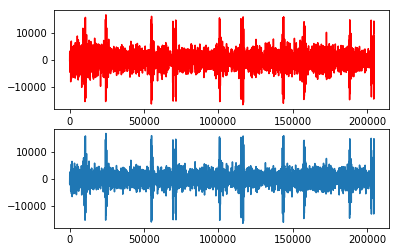

In [161]:
# Skip the song intro
data_start = 200000
# A 1024 sample could be a beat. 
beat_sample_size = 1024
# ambient energy is calculated from 1 second of the song
ambient_data_size = 44*beat_sample_size
# lets check this beat samples
samples = 200

#lets see some random audio data in the song... 
plt.subplot(2,1,1)
plt.plot(data[data_start:(data_start + samples*beat_sample_size),0], 'r')
plt.subplot(2,1,2)
plt.plot(data[data_start:data_start + samples*beat_sample_size,1])
plt.show()


In [162]:
# data is read in as int. need to convert integer data to float data
data = data.astype('float')
# print(data)

In [163]:

def total_energy(data):
    sq = np.square(data)
    sum_sq = np.sum(sq)
    return sum_sq


http://www.flipcode.com/misc/BeatDetectionAlgorithms.pdf

Implement the simple energy calculator by first calculating the ambient energy.

ambient_energy = total sum of squares from a 44 blocks (1 second), then find the average per block


In [164]:
ambient_data = data[data_start:(data_start+ambient_data_size),0]

print(ambient_data)

ambient_energy = total_energy(ambient_data)

print(ambient_energy)

[ -223.   -75.    61. ...,  3776.  3758.  3711.]
557642963151.0


In [165]:
# A 1024 sample could be a beat. Test calculation of the energy

beat_energy = total_energy(data[data_start:(data_start+beat_sample_size), 0])

In [166]:
print(beat_energy)

9009757723.0


In [167]:
sample_range = range(samples)

beats = np.zeros(1)

for sample in sample_range:
    sample_start = data_start + sample * beat_sample_size
    beat_energy = total_energy(data[sample_start:(sample_start+beat_sample_size), 0])
    beat_ratio = beat_energy / (ambient_energy/44)
    beats = np.append(beats, beat_ratio)
    

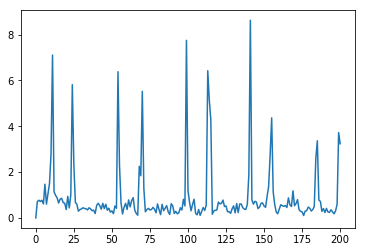

In [168]:
plt.plot(beats)
plt.show()